**Challenge**

Consider an integer n > 99 and treat it is as a sequence of digits (so that 561 becomes [5,6,1]).
Now insert between every two consecutive digits a symbol
 '+', '-', or '==', in such a way that
there is exactly one '=='. We get an equality, that can be true or false. If we can do it in such a way
that it is true, we call n good; otherwise n is bad. For instance, 5 == 6 - 1, so 561 is good, but
562 is bad.

1) Give an example of a block of consecutive integers, each of them bad, of length 17.

2) Prove that any block of consecutive integers, each of them bad, has length at most 18.

3) Does there exist a block of consecutive integers, each of them bad, of length 18?

**Explanation of Code**

The goal of this program is to brute force test as many numbers as possible to solve problems 1 and 3.

The program starts off with 100, the lowest number allowed for n. 
A function, constructOperationMatrix, will construct a two dimensional matrix containing all possible operation
permutations allowed for any n. 

To provide an example:

Take a number, say 1234.
12345 is 5 digits long, and it has 3 spots to insert an operation. 
However we may only insert 1 equal anywhere, but the rest can be a plus or a minus.
Example: 1 + 2 + 3 = 4
To simplify things, we will ignore the numbers temporarily.
[+, +, =]
This list, when inserted into any four digit number, will construct an equality. 
Since there are many more of these operations (for values of n with greater length), figuring out how to construct
all of these operations can get tricky.
This next step involves ignoring the equal sign.
It is simple to construct a list of just plus and minus, as since that is a binary relationship, we can 
just compute the set of all operations as if we are adding 1 to a binary number, say + is 1 and - is 0.
In this system, the function assumes that the number is the same length as n - 2, which our number was 1234, length
4, so 4 - 2 = 2. The list without the equals is 2 units long, so all possible sets of operations for a 4-digit number
without the equals sign would be this:
```
[
    ['-','-'],
    ['+','-'],
    ['-','+'],
    ['+','+']
]
```
Now, all we have to do is take the length of each of those lists, 2, and add back 1 slot to it. 
Then, since we now have three slots, simply triplicate the set:
```
 [
    ['-','-'],
    ['+','-'],
    ['-','+'],
    ['+','+'],
    
    ['-','-'],
    ['+','-'],
    ['-','+'],
    ['+','+'],

    ['-','-'],
    ['+','-'],
    ['-','+'],
    ['+','+']

]
```
Then, append an equals sign at position 1 for the first chunk, position 2 for the second chunk, and so on:
```
[
    ['=','-','-'],
    ['=','+','-'],
    ['=','-','+'],
    ['=','+','+'],
    
    ['-','=','-'],
    ['+','=','-'],
    ['-','=','+'],
    ['+','=','+'],

    ['-','-','='],
    ['+','-','='],
    ['-','+','='],
    ['+','+','=']

]
```
And now we have the matrix that contains every possible operation allowed within the rules of the competition.
What the program does next is it takes a value of n, and computes the matrix of operations for length of n,
(but only one time per number length, to save computer resources so it doesn't recompute the matrix every time for n)
then inserts the first operation set into number n. 
The function evaluates the equation, and if it returns true, then the function prints that n is good, and goes on to the next
value of n. 
If the first operation set evaluates false, then it will continue down the operation set until evaluating true ("good"), or 
if it never evaluates to true through any operation, the function will print that n is bad.

Another equation takes the test good/bad function, and counts the length of consecutive bad numbers by keeping a count. If it finds
a bad number, it adds 1 to the count. If it finds a good number, it outputs the length of consecutive bad numbers and the range,
then resets the count and continues for as long as you tell it to.

AI was not used to generate any code, and the internet was not used to get help with the problem.



In [ ]:
#A nice join function to concatenate a list into a string

def join(stuff):
    thingy = ''.join(stuff)
    return thingy

In [5]:
#Code to construct the operations matrix for evaluating possible solutions

matrix =[]

def constructOperationsMatrix(n):
    submatrix = []
    nTest = None #Binary counting number
    nLen = len(str(n)) #Length of n
    nBin = int(bin(2**(nLen-2)),2) # 
    for i in range(0,2**(nLen-2)):
    
        if nTest == None:#Only does this once
            nTest = nBin
        nCut = str(bin(nTest)).replace('0b1','')#Replaces binary ID of string so we just get the 1's and 0's.
        nCutList = list(nCut) #Turns the string of 1s and 0s into a list

        for i in range(len(nCut)):#Swaps + for 1, - for 0

            if nCutList[i] == '1':
                nCutList[i] = '+'
            elif nCutList[i] == '0':
                nCutList[i] = '-'
        for i in range(len(nCutList)+1):
            submatrix.append(nCutList[:])
        nTest = nTest + 1
    for i in range(0,(len(nCutList)+1)*(2**(nLen-2))):
        submatrix[i].insert((i % (len(nCutList)+1)),'==')
    return submatrix

In [6]:
import math
#Test if given number is good or bad
def testGoodBad(n): #input is any integer greater than 100
    nMatrix = constructOperationsMatrix(n)
    nList = list(str(n))
    nEqn = []
    testingList = []
    #this is what gets a number, splices it, inserts the operations, rejoins it, and evaluates it
    for z in nMatrix:
        nOps = z
        nSubList = list(str(n))
        
        for i in range(len(nOps)):
            nSubList.insert((i*2+1),nOps[i])
        testingList.append(eval(join(nSubList)))
        
        nSubList.clear()

    if True in testingList:
        return True
    else:
        return False

In [7]:
# Same as other test function, but you need to have the defined operations matrix beforehand to test.
def testGoodBadNoMatrix(n,matrix):
    nMatrix = matrix
    nList = list(str(n))
    nEqn = []

    testingList = []

    for z in nMatrix:
        nOps = z
        nSubList = list(str(n))
        
        for i in range(len(nOps)):
            nSubList.insert((i*2+1),nOps[i])
        testingList.append(eval(join(nSubList)))
        nSubList.clear()
    if True in testingList:
        return True
    else:
        return False
    

In [8]:
def testGoodBadShowMatrix(n): 
    #print(n)
    nMatrix = constructOperationsMatrix(n)
    nList = list(str(n))
    nEqn = []
    testingList = []
  
    for z in nMatrix:
        nOps = z
        nSubList = list(str(n))
        
        for i in range(len(nOps)):
            nSubList.insert((i*2+1),nOps[i])
        if eval(join(nSubList)) == True:
            testingList.append(join(nSubList))
        
        nSubList.clear()
    print(testingList)

   

In [9]:
#Function to find long lists of consecutive bad numbers. Searches within range, 
import sys

def findLongBads(min,max,countLength):
    
    startNum = 0
    endNum = 0
    count = 0
    
    for i in range(min,max):
        thisMatrix = constructOperationsMatrix(i)
        if testGoodBadNoMatrix(i,thisMatrix) == False:
            count = count + 1
        else:
            endNum = i
            if count == countLength:
                print('')
                print(f'list(range({startNum+1},{endNum-1}+1)): {count}')
            count = 0
            startNum = i
            #sys.stdout.write(f'\r{(i-min)/(max-min)*100}')#show percent searched of range

    

In [ ]:
#Function to visualize when the numbers turn good or bad
startValue = 0
def plotCumulativeSum(xMin,xMax,addWhat,subtractWhat,logYesNo):
    global startValue 
    startValue = 0
    def func(x):
        
        result = testGoodBad(x)
        if result == True:
            addValue = addWhat
        else: 
            addValue = subtractWhat
        global startValue
        startValue = startValue + addValue
        return startValue
        
    import matplotlib.pyplot as plt  # Correct import
    import math
    # Ensure x is a list of integers
    x = list(range(xMin, xMax))

    # Apply func to each element in x
    y = [func(i-1) for i in x]  # Apply function element-wise

    # Plot the values
    plt.plot(x, y, linestyle = 'solid')
    plt.xlabel("x")
    if logYesNo == True:
        plt.xscale('log')
    plt.title("True/False Cumulative Sum")
    plt.grid(True)
    plt.legend()
    plt.show()


C:\Users\kaden\AppData\Local\Temp\ipykernel_6908\3112712697.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


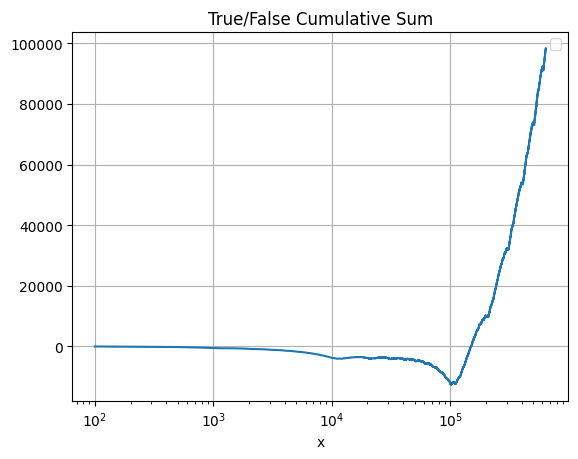

In [ ]:
#EVALUATION TEST AREA

plotCumulativeSum(100,640000,2,-1,False)
#findLongBads(99000,900107,17)

In [12]:
#The +1 is only there because I want to represent the actual range,
solutionSet17Long = [
    list(range(892,908+1)),  
    list(range(9091,9107+1)),  
    list(range(89992,90008+1)), 
    list(range(90091,90107+1)),  
    list(range(99892,99908+1)), 
#CONFIRMED NO 17-LONG SETS BETWEEN
    list(range(900091,900107+1)),  
    list(range(909892,909908+1)),  
    list(range(909991,910007+1)),  
    list(range(990892,990908+1)),  
    list(range(999091,999107+1)),  
#Haven't searched in between here
    list(range(9000091,9000107+1)),  
    list(range(9009892,9009908+1)),  
    list(range(9009991,9010007+1)),  
    list(range(9090892,9090908+1)),  
    list(range(9099091,9099107+1)),
#Haven't searched in between here
    list(range(90000091,90000107+1)),
    list(range(90009892,90009908+1)),
    list(range(90009991,90010007+1)),
    list(range(90090892,90090908+1)),
    list(range(90099091,90099107+1))
#Can we assume this pattern continues? Obviously, we can continue it, but what if there is 
    
]


**Raw Brainstorming and Thinking**

While observing the found solution sets of 17-number long consecutive lists of bad numbers:

- Every single number in these sets contains at least one number nine somewhere in the number..
- After the third set, *all* numbers in *all* of the sets start with 9.
- Sets are found in groups of 5 close to each other, seemingly only five solution sets per number length.
- The ending digit of every number that starts a new consecutive list

Why is this?

- We are asked to prove that any consecutive set of bad numbers is at most 18. 18 is obviously 2*9, there must be some relation.
- What about trying with a different base system? If working in base 5, would there be a 4 in every integer?
- Perhaps the base of the number system determines the maximum length of consecutive bad numbers.
- Perhaps if we can prove that the probability of all digits but the last two being able to be added or subtracted to create a number less than or equal to 18.

So for example, take the number 123456, if we can prove 1,2,3,4 can be made to a number less than 18, then counting up starting at that number must yield a point where the last two digits can be summed to a number less than 18, we can then prove that any list of consecutive numbers must be less than or equal to 18 in length because the last two digits could be manipulated to form a number less than or equal to 18. 

Wait, what if we test numbers for this probability by seeing what happens when we insert alternating '+' and '-' every time? How often would that yield a number close to 18? Or making a program that always constructs an insertion of '+' or '-' that will always be less than 18, not including the last two digits?

An example of my thinking:

Make it so a number '#####' can be split into an equation like so: # ± # ± # == # ± #
Then, find probability that there exists a combination of plus and minus on the left side resulting in a number less than or equal to 18, and since we know that  any two number on the right side MUST be less than or equal to 18, since the greatest number would be 18 (9+9), and the lowest, -9, (0-9). But how to compute that probability? Especially for larger numbers.
Since we are asked to prove that there is a maximum length of 18 for any consecutive bad set, 
But wait, we need to consider why there is a 9 in every number. 


**Notes about the Cumulative Sum Graphs**

Note: This is unrelated to solving the actual challenge.

The cumulative sums are constructed as follows: Start with zero. If a number is bad, subtract from that zero, or the whole sum, by 1. If it is good, then 1 or 2 is added to the sum. (depending on which graph you look at.)

For example, since the number 100 is bad (we cannot make a true statement), we subtract 1. (and we have to start at 100 because it's impossible to construct an equation with the given criteria of the challenge for any number less than 100, since we have to have at least one equals and one + or -  in between the numbers.) Next number

Why on earth does the 2x sum yield graphs that appear to be fractal-like the farther we zoom out? The 1x graphs also appear like that but less so. Perhaps there is some relation to the Collatz conjecture? 
